# Informe Tarea PySpark
Carlos Hernani Morales

Esta tarea consiste en ver las ventajas de la paralelización en el cálculo de una simulación de Montecarlo para el cálculo de $\pi$ .

In [44]:
from pyspark import SparkContext
#!pip install matplotlib
import matplotlib.pyplot as plt
import random
import pandas
import os
import timeit

In [45]:
N_CORES_MAX = int(os.popen("nproc").read())
N_SAMPLES_MAX = 10000000
N_SAMPLES_MIN = 1000000
print(N_CORES_MAX)

def inside(p):
    x, y = random.random(), random.random()
    return x*x + y*y < 1

8


In [ ]:
# Descomentar esta parte si interesa repetir el cálculo
# data = []
# for cores in range(1,N_CORES_MAX-3):
#     sc = SparkContext(master = "local[" + str(cores) + "]")
#     for samples in range(N_SAMPLES_MIN,N_SAMPLES_MAX,1000000):
#         elapsed_time = %timeit -n 1 -o sc.parallelize(range(0, samples)).filter(inside).count()
#         print("Cores: {0}\tSamples: {1}".format(cores,samples))
#         #print("Pi is roughly {0} with {1} cores used.".format(4*count/samples,cores))
#         data.append([cores,samples,elapsed_time.average])

# data = pandas.DataFrame(data)
#data.to_csv("pi_acc.csv")

In [ ]:
df = pandas.read_csv("pi_acc.csv")
df.columns = ['b', 'cores', 'samples', 'elapsed_time']
df = df.drop(['b'], axis=1)
df.head(10)

In [ ]:
b_unicore = df[df.cores == 1]
b_multicore = df[df.cores != 1]
b_multicore = b_multicore.reset_index()
c = pandas.concat([b_unicore]*3)["elapsed_time"].reset_index()
b_multicore["elapsed_time_uni"] = c["elapsed_time"]
b_multicore["acc"] = b_multicore.apply(lambda x: x[4]/x[3], axis=1)
b_multicore["samples"] = b_multicore["samples"]/1000000
b_multicore.head(10)

In [ ]:
#!pip install seaborn

Text(0.5, 0, 'Número de muestras x1e6')

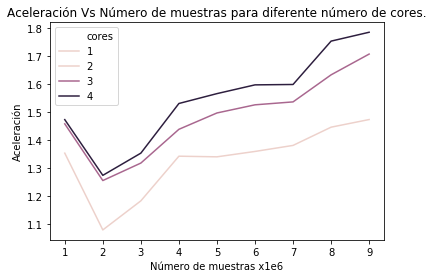

In [46]:
import seaborn as sns
ax = sns.lineplot(data=b_multicore, x="samples", y="acc", hue="cores")
ax.set_title("Aceleración Vs Número de muestras para diferente número de cores.")
ax.set_ylabel("Aceleración")
ax.set_xlabel("Número de muestras x1e6")


Como se puede ver PySpark nos permite paralelizar el cálculo de pi usando desde 1 núcleo (no paralelo) a varios, en mi caso el límite que le he puesto ha sido 4.
Es interesante ver que a medida que crece nuestro problema el creciemiento de la aceleración es más pronunciado cuando hacemos uso de varios núcleos.
Esto significa que a medida que tenemos un problema más complejo y grande es interesante realizarlo en paralelo para reducir el tiempo de cálculo.